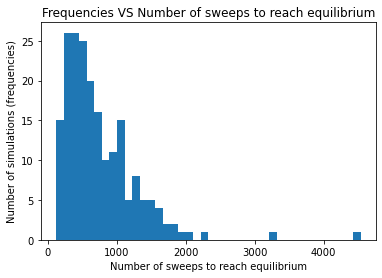

It took: 31.772281563282014 minutes to run


In [2]:
import matplotlib
import sys
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
import time
import scipy as sp
from scipy import ndimage

start_time=time.time()


#Number of Montecarlo sweeps for calculation
sweeps = 6000    

#Ask for array length
N=50


#Generate random initial state
def randominitialstate(N):   
    
    initstate = np.random.randint(2, size=(N,N))
    return initstate


def calculateTime(cell):
    
    activeCells= np.sum(cell)
    return activeCells

def nextState(cell):
    
    newcell=np.zeros((N,N))
    
    for a in range(N):
        for b in range(N):
            
            neighbours = cell[(a+1)%N,b] + cell[a,(b+1)%N] + cell[(a-1)%N,b] + cell[a,(b-1)%N] + cell[(a+1)%N,(b+1)%N] + cell[(a+1)%N,(b-1)%N] + cell[(a-1)%N, (b-1)%N] + cell[(a-1)%N, (b+1)%N]
            
            if cell[a,b] == 1:
                
                if neighbours < 2:
                    newcell[a,b]=0
                elif neighbours > 3:
                    newcell[a,b]=0
            
                else:
                    newcell[a,b]=1
            else:
                if neighbours == 3:
                    newcell[a,b]=1
  
    cell = newcell

    return cell
            

Plotactivesteps=np.zeros(sweeps)
numsweeps=np.zeros(200)

for j in range (200):
    
    cell = randominitialstate(N)
    for i in range(sweeps):         
        
        cell = nextState(cell)
        Plotactivesteps[i] = calculateTime(cell)
    
        if i > 10 and abs(Plotactivesteps[i]-Plotactivesteps[i-1])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-2])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-3])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-4])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-5])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-6])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-7])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-8])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-9])<5 and abs(Plotactivesteps[i]-Plotactivesteps[i-10])<5:
            numsweeps[j]=(i-10)
            break

HistrogramData=pd.DataFrame(numsweeps)
HistrogramData.to_csv('histogramData.csv',index=False)
HistogramDataPlot = pd.read_csv("histogramData.csv")

plt.hist(numsweeps, bins=40)
plt.title("Frequencies VS Number of sweeps to reach equilibrium")
plt.xlabel("Number of sweeps to reach equilibrium")
plt.ylabel("Number of simulations (frequencies)")
plt.show()
print("It took: "+str((time.time()-start_time)/60)+" minutes to run")